In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("googleplaystore (1).csv")

# Preview data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [3]:
# Check missing values in each column
df.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
# Drop rows with missing values in important columns
df.dropna(subset=['Rating', 'Reviews', 'Size', 'Installs'], inplace=True)


In [5]:
# Drop duplicate rows if any
df.drop_duplicates(inplace=True)


In [6]:
df['Reviews'] = df['Reviews'].replace('3.0M', '3000000')  # Fix any special case
df['Reviews'] = df['Reviews'].astype(float)


In [8]:
# Replace "+" and "," characters
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)

# Remove rows that still contain non-numeric values (like 'Free')
df = df[df['Installs'].str.isnumeric()]

# Now safely convert to float
df['Installs'] = df['Installs'].astype(float)



In [9]:
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = df['Price'].astype(float)


In [10]:
import numpy as np

def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1000
    elif size == 'Varies with device':
        return np.nan
    else:
        return np.nan

df['Size'] = df['Size'].apply(convert_size)


In [11]:
df.dropna(subset=['Size'], inplace=True)


In [12]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 7424 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7424 non-null   object 
 1   Category        7424 non-null   object 
 2   Rating          7424 non-null   float64
 3   Reviews         7424 non-null   float64
 4   Size            7424 non-null   float64
 5   Installs        7424 non-null   float64
 6   Type            7424 non-null   object 
 7   Price           7424 non-null   float64
 8   Content Rating  7424 non-null   object 
 9   Genres          7424 non-null   object 
 10  Last Updated    7424 non-null   object 
 11  Current Ver     7420 non-null   object 
 12  Android Ver     7422 non-null   object 
dtypes: float64(5), object(8)
memory usage: 812.0+ KB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Type'] = label_encoder.fit_transform(df['Type'])
df['Genres'] = label_encoder.fit_transform(df['Genres'])
df['Content Rating'] = label_encoder.fit_transform(df['Content Rating'])


In [14]:
df.describe()


,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
count,7424.000000,7424.000000,7.424000e+03,7424.000000,7.424000e+03,7424.000000,7424.000000,7424.000000,7424.000000
mean,16.585399,4.171309,2.787740e+05,22.747621,7.823918e+06,0.073680,1.116599,1.466191,60.167565
std,8.139957,0.549729,1.743621e+06,23.434790,4.630411e+07,0.261267,17.708566,1.006480,32.010514
min,0.000000,1.000000,1.000000e+00,0.008500,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,11.000000,4.000000,9.900000e+01,5.100000,1.000000e+04,0.000000,0.000000,1.000000,35.000000
50%,14.000000,4.300000,2.067000e+03,14.000000,1.000000e+05,0.000000,0.000000,1.000000,64.000000
75%,24.000000,4.500000,3.689475e+04,33.000000,1.000000e+06,0.000000,0.000000,1.000000,91.000000
max,32.000000,5.000000,4.489389e+07,100.000000,1.000000e+09,1.000000,400.000000,5.000000,111.000000


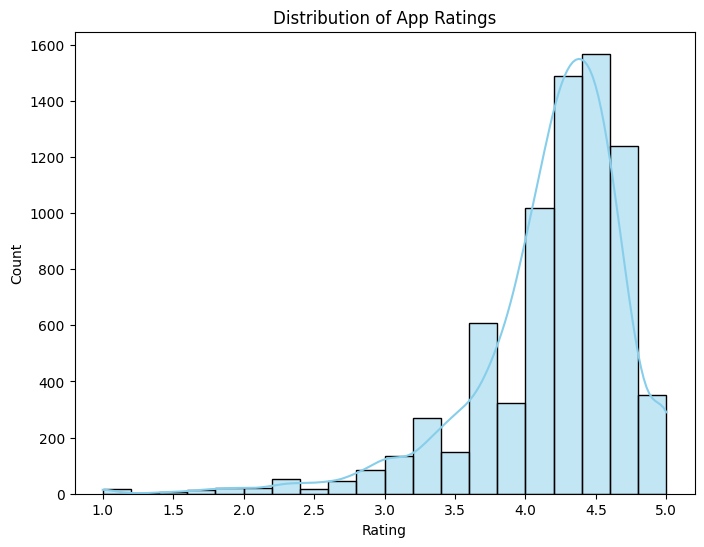

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


C:\Users\Sri Bhanu Swarna\AppData\Local\Temp\ipykernel_6728\1426811922.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='coolwarm')


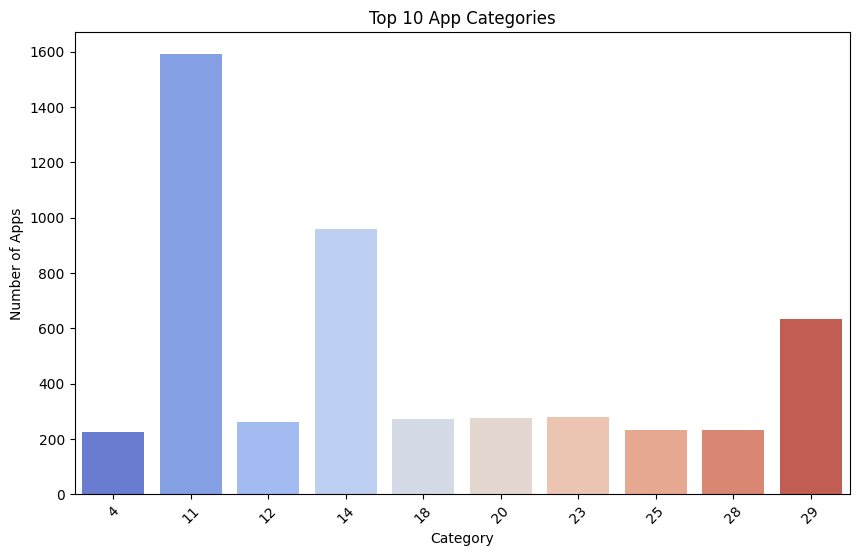

In [16]:
top_categories = df['Category'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='coolwarm')
plt.title('Top 10 App Categories')
plt.ylabel('Number of Apps')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()


C:\Users\Sri Bhanu Swarna\AppData\Local\Temp\ipykernel_6728\175269635.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type', palette='Set2')


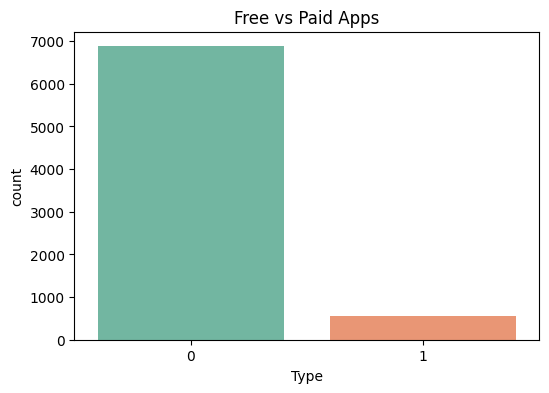

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Type', palette='Set2')
plt.title('Free vs Paid Apps')
plt.show()


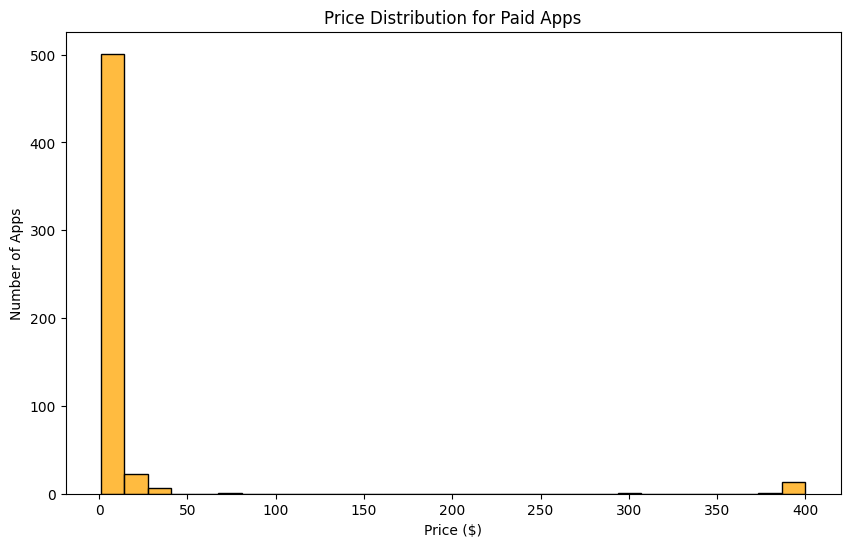

In [18]:
paid_apps = df[df['Type'] == 1]  # If you've encoded 'Free' and 'Paid' as 0/1

plt.figure(figsize=(10, 6))
sns.histplot(paid_apps['Price'], bins=30, color='orange')
plt.title('Price Distribution for Paid Apps')
plt.xlabel('Price ($)')
plt.ylabel('Number of Apps')
plt.show()


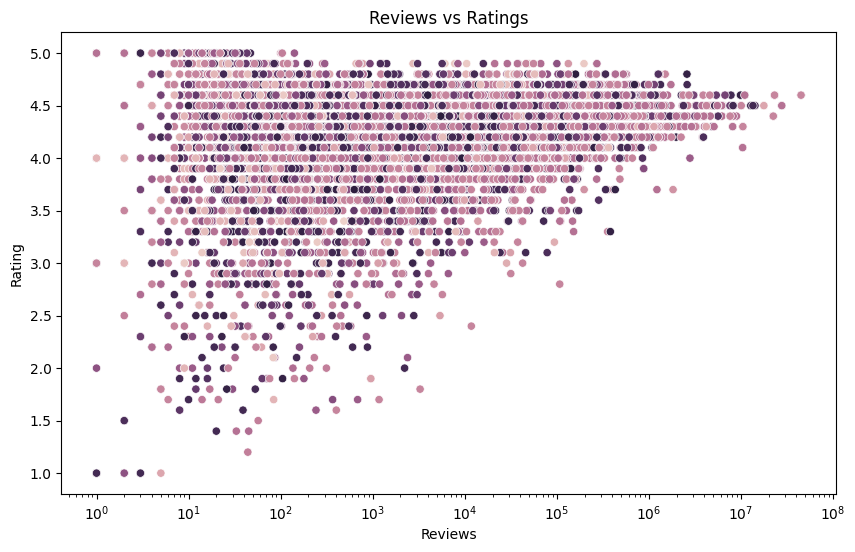

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Reviews', y='Rating', hue='Category', legend=False)
plt.title('Reviews vs Ratings')
plt.xscale('log')  # Log scale for better visibility
plt.show()


C:\Users\Sri Bhanu Swarna\AppData\Local\Temp\ipykernel_6728\1829842365.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


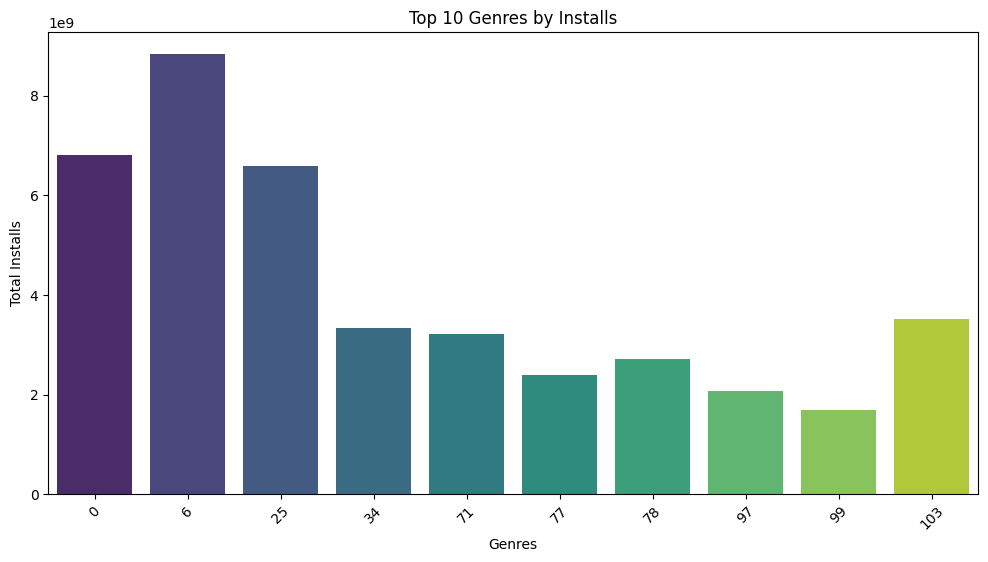

In [20]:
top_genres = df.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Genres by Installs')
plt.ylabel('Total Installs')
plt.xticks(rotation=45)
plt.show()


In [21]:
features = ['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Genres', 'Content Rating']
X = df[features]
y = df['Rating']


In [22]:
y.fillna(y.median(), inplace=True)


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['Category'] = le.fit_transform(X['Category'])
X['Type'] = le.fit_transform(X['Type'])
X['Genres'] = le.fit_transform(X['Genres'])
X['Content Rating'] = le.fit_transform(X['Content Rating'])


C:\Users\Sri Bhanu Swarna\AppData\Local\Temp\ipykernel_6728\1768917521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Category'] = le.fit_transform(X['Category'])
C:\Users\Sri Bhanu Swarna\AppData\Local\Temp\ipykernel_6728\1768917521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Type'] = le.fit_transform(X['Type'])
C:\Users\Sri Bhanu Swarna\AppData\Local\Temp\ipykernel_6728\1768917521.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 0.29
R-squared Score: 0.09


In [27]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head(10)


,Actual,Predicted
1867,4.3,4.467
4414,3.7,3.880
116,4.4,4.166
7608,4.7,3.983
9463,4.0,4.220
10313,3.1,4.086
6541,4.4,3.962
8967,3.0,4.482
3518,4.2,4.226
7661,4.4,3.824
